# Use Case From: https://www.kaggle.com/blastchar/telco-customer-churn

In [203]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [204]:
df = pd.read_csv(r'telco.csv')

In [205]:
df.apply(lambda x: sum(x.isnull()),axis = 0)

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [206]:
for i in df.columns:
    if len(list(df[i].unique())) <= 5:
        print("%s : %s -> %s" % (i , len(list(df[i].unique())) , df[i].dtype))
        print("%s : %s\n" % (i , list(df[i].unique())))
    else:
        print("%s : %s -> %s\n" % (i , len(list(df[i].unique())) , df[i].dtype))

customerID : 7043 -> object

gender : 2 -> object
gender : ['Female', 'Male']

SeniorCitizen : 2 -> int64
SeniorCitizen : [0, 1]

Partner : 2 -> object
Partner : ['Yes', 'No']

Dependents : 2 -> object
Dependents : ['No', 'Yes']

tenure : 73 -> int64

PhoneService : 2 -> object
PhoneService : ['No', 'Yes']

MultipleLines : 3 -> object
MultipleLines : ['No phone service', 'No', 'Yes']

InternetService : 3 -> object
InternetService : ['DSL', 'Fiber optic', 'No']

OnlineSecurity : 3 -> object
OnlineSecurity : ['No', 'Yes', 'No internet service']

OnlineBackup : 3 -> object
OnlineBackup : ['Yes', 'No', 'No internet service']

DeviceProtection : 3 -> object
DeviceProtection : ['No', 'Yes', 'No internet service']

TechSupport : 3 -> object
TechSupport : ['No', 'Yes', 'No internet service']

StreamingTV : 3 -> object
StreamingTV : ['No', 'Yes', 'No internet service']

StreamingMovies : 3 -> object
StreamingMovies : ['No', 'Yes', 'No internet service']

Contract : 3 -> object
Contract : ['Mont

# Cells under TotalCharges in which the value is a blank, have a corresponding tenure of 0 Months, so we can just fill in these values with 0

In [207]:
interestedcols = ['PhoneService', 'MultipleLines' , 'InternetService' , 'OnlineSecurity' , 'OnlineBackup' , 'DeviceProtection' , 'TechSupport' , 'StreamingTV' , 'StreamingMovies' , 'tenure' , 'MonthlyCharges' , 'TotalCharges']
df[interestedcols].loc[df.TotalCharges.str.contains(' ')]

,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,tenure,MonthlyCharges,TotalCharges
488,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,0,52.55,
753,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,0,20.25,
936,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,0,80.85,
1082,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,0,25.75,
1340,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,0,56.05,
3331,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,0,19.85,
3826,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,0,25.35,
4380,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,0,20.00,
5218,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,0,19.70,
6670,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,0,73.35,


In [208]:
df.TotalCharges = df.TotalCharges.apply(lambda x: np.nan if x == ' ' else x)

In [209]:
df.TotalCharges = df.TotalCharges.astype(float)

In [210]:
df.TotalCharges = df.TotalCharges.fillna(0)

# Encoding the categorical features and training the baseline model

In [211]:
binary_cols_enc = ['gender' , 'Partner' , 'Dependents' , 'PhoneService' , 'PaperlessBilling' , 'Churn']
one_hot_cols = ['MultipleLines' , 'InternetService' , 'OnlineSecurity' , 'OnlineBackup' , 'DeviceProtection' , 'TechSupport' , 'StreamingTV' , 'StreamingMovies' , 'Contract' , 'PaymentMethod']

In [212]:
from sklearn import preprocessing
lb = preprocessing.LabelBinarizer()

In [213]:
binary_map_dict = {}
for i in binary_cols_enc:
    df[i] = lb.fit_transform(df[i])
    binary_map_dict[i] = {index: label for index,label in enumerate(lb.classes_)}

In [214]:
new_df = pd.get_dummies(data = df , columns = one_hot_cols )

In [215]:
X = new_df.drop(columns = ['Churn'])
y = new_df.Churn

In [216]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.2 , random_state = 32)

In [217]:
train_identifier = X_train.customerID
X_train = X_train.drop(columns = 'customerID')

In [218]:
test_identifier = X_test.customerID
X_test = X_test.drop(columns = 'customerID')

In [219]:
from sklearn.metrics import classification_report , confusion_matrix
from sklearn.ensemble import RandomForestClassifier

In [220]:
rf = RandomForestClassifier(n_estimators = 100)

In [221]:
rf.fit(X_train , y_train)
y_pred = rf.predict(X_test)

In [222]:
from sklearn.metrics import classification_report
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

           0       0.80      0.89      0.85       996
           1       0.65      0.47      0.54       413

   micro avg       0.77      0.77      0.77      1409
   macro avg       0.72      0.68      0.69      1409
weighted avg       0.76      0.77      0.76      1409



In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'bootstrap' : [True],
    'max_depth': [80,90,100,110],
    'max_features': [2,3,4],
    'min_samples_leaf':[3,4,5],
    'min_samples_split':[8,10,12],
    'n_estimators' : [100,200,300,1000,1500,200]
}

grid_search = GridSearchCV(estimator = rf , param_grid = param_grid , cv = 3 , n_jobs = -1 , verbose = 2)

In [ ]:
grid_search.fit(X_train , y_train)

In [ ]:
best_params = grid_search.best_params_

In [ ]:
grid_search_predictions = grid_search.predict(X_test)

# Baseline Performance: RF Model with minimal cleaning

In [ ]:
print(classification_report(y_test , grid_search_predictions))

# Feature Engineering to improve model performance

In [223]:
from imblearn.over_sampling import SMOTE

In [224]:
sm = SMOTE(random_state=12 , ratio = 1)
x_train_res  , y_train_res = sm.fit_sample(X_train , y_train)

In [225]:
rf_new = RandomForestClassifier(bootstrap = True , max_depth = 90 , max_features = 4 , min_samples_leaf = 5 , min_samples_split = 8 , n_estimators = 100)
rf_new.fit(x_train_res , y_train_res)
y_pred = rf_new.predict(X_test)
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

           0       0.83      0.88      0.85       996
           1       0.66      0.57      0.61       413

   micro avg       0.79      0.79      0.79      1409
   macro avg       0.75      0.72      0.73      1409
weighted avg       0.78      0.79      0.78      1409



In [226]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 35 , penalty = 'l1' , C = 0.2)
classifier.fit(x_train_res , y_train_res)
y_pred = classifier.predict(X_test)
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

           0       0.91      0.71      0.80       996
           1       0.54      0.83      0.65       413

   micro avg       0.74      0.74      0.74      1409
   macro avg       0.72      0.77      0.73      1409
weighted avg       0.80      0.74      0.75      1409



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [227]:
categorical = df.columns.drop(['customerID' , 'tenure' , 'MonthlyCharges' , 'TotalCharges'])

In [228]:
numerical = ['tenure' , 'MonthlyCharges' , 'TotalCharges']

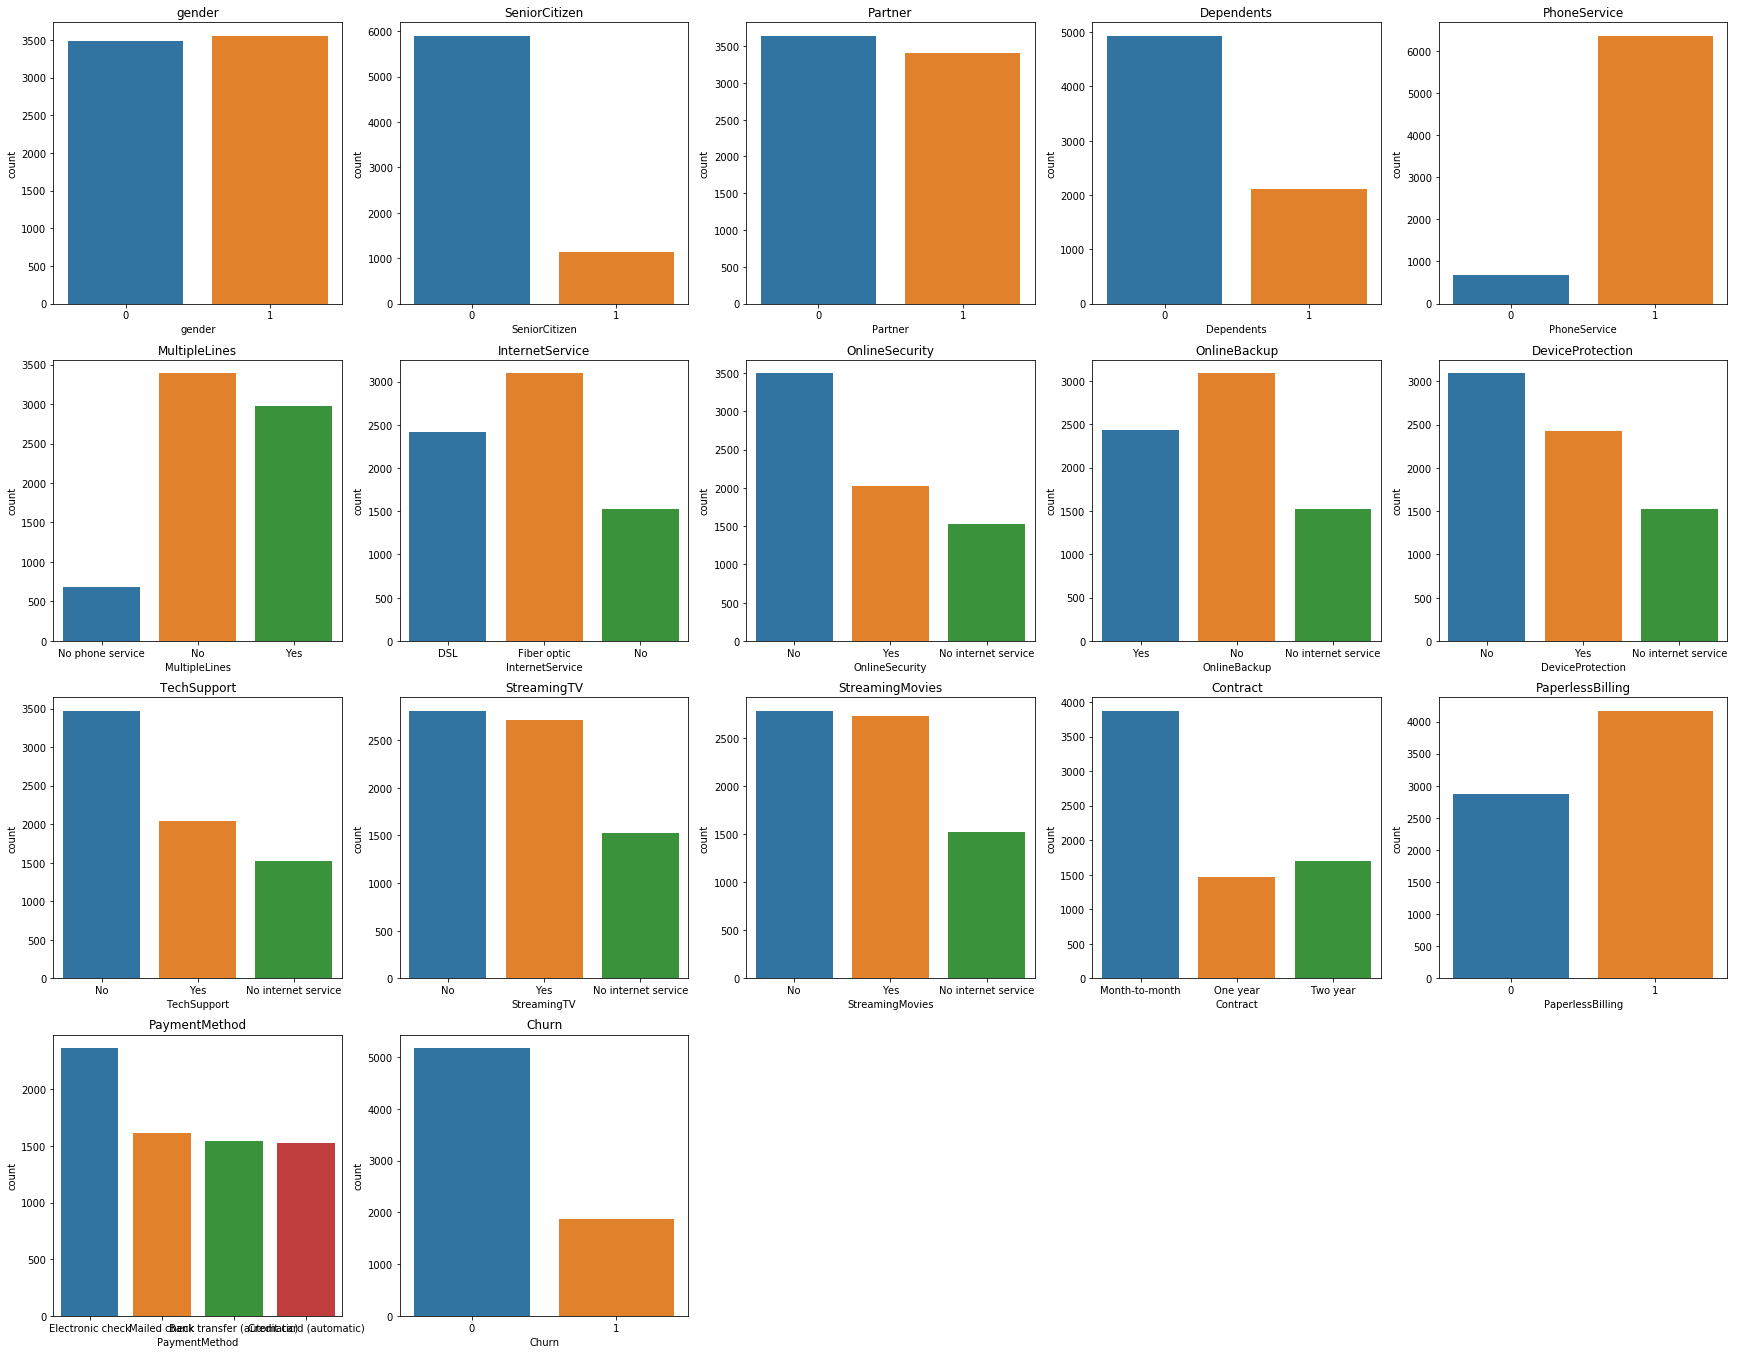

In [229]:
j = 1
plt.figure(figsize = (30,30))
for i in categorical:
    plt.subplot(5,5,j)
    f = plt.gca()
    f.set_title(i)
    sns.countplot(df[i])
    j += 1

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


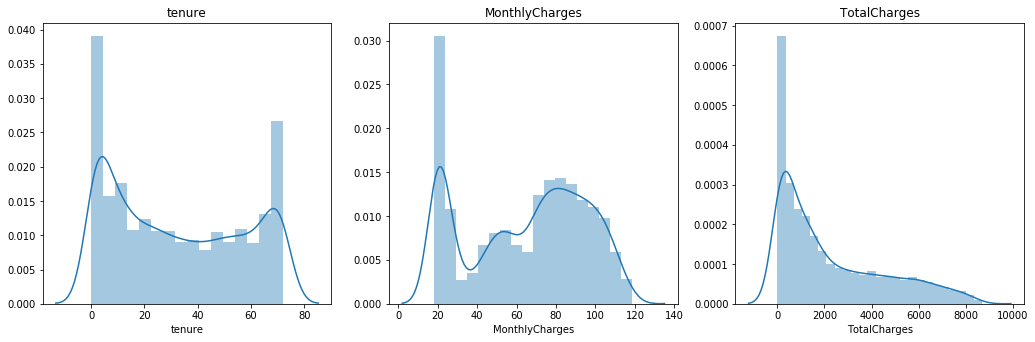

In [230]:
j = 1
plt.figure(figsize = (30,30))
for i in numerical:
    plt.subplot(5,5,j)
    f = plt.gca()
    f.set_title(i)
    sns.distplot(df[i])
    j += 1

# 'tenure' and 'TotalCharges' have a very high correlation factor, plotting the graph shows a linear relationship. Hence, I'll get rid of this correlation by finding 'm' in your standard y = mx + c equation to capture this relationship.

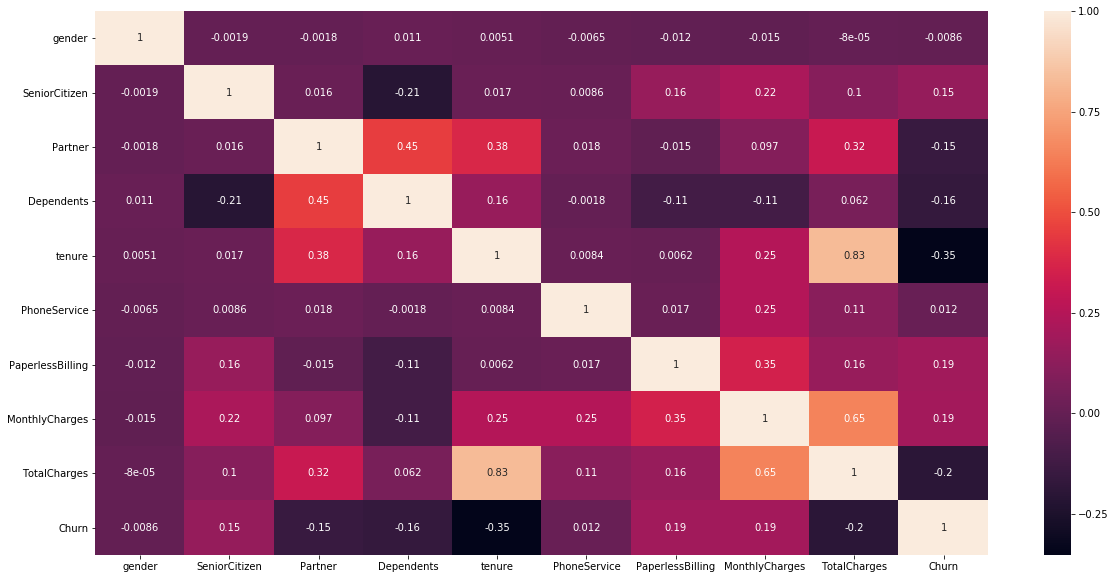

In [232]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr() , annot = True)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


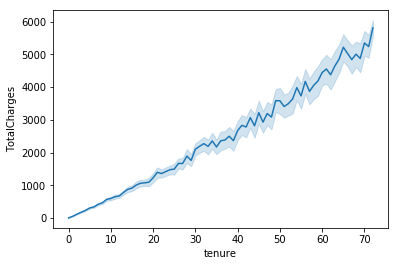

In [233]:
sns.lineplot(data = df , x = 'tenure' , y = 'TotalCharges')

In [82]:
def newmonthlycharge(x):
    if x[0] == 0:
        return x[1]
    else:
        return x[2] / x[0]

In [83]:
new_df['MonthlyCharge']  = new_df[['tenure','MonthlyCharges','TotalCharges']].apply(newmonthlycharge,axis = 1)
new_df = new_df.drop(columns = ['tenure','TotalCharges','MonthlyCharges'])

# Retraining models, and comparing performance of tuned LR and RF models

In [111]:
X = new_df.drop(columns = ['Churn'])
y = new_df.Churn
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.2 , random_state = 32)
train_identifier = X_train.customerID
X_train = X_train.drop(columns = 'customerID')
test_identifier = X_test.customerID
X_test = X_test.drop(columns = 'customerID')
sm = SMOTE(random_state=12 , ratio = 0.75)
x_train_res  , y_train_res = sm.fit_sample(X_train , y_train)
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 35 , penalty = 'l1' , C = 0.2)
classifier.fit(x_train_res , y_train_res)
y_pred = classifier.predict(X_test)
print(classification_report(y_test , y_pred))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


              precision    recall  f1-score   support

           0       0.89      0.74      0.81       996
           1       0.55      0.78      0.65       413

   micro avg       0.75      0.75      0.75      1409
   macro avg       0.72      0.76      0.73      1409
weighted avg       0.79      0.75      0.76      1409



In [112]:
rf_new = RandomForestClassifier(bootstrap = True , max_depth = 90 , max_features = 4 , min_samples_leaf = 5 , min_samples_split = 8 , n_estimators = 100)
rf_new.fit(x_train_res , y_train_res)
y_pred = rf_new.predict(X_test)
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

           0       0.84      0.84      0.84       996
           1       0.61      0.61      0.61       413

   micro avg       0.77      0.77      0.77      1409
   macro avg       0.72      0.72      0.72      1409
weighted avg       0.77      0.77      0.77      1409



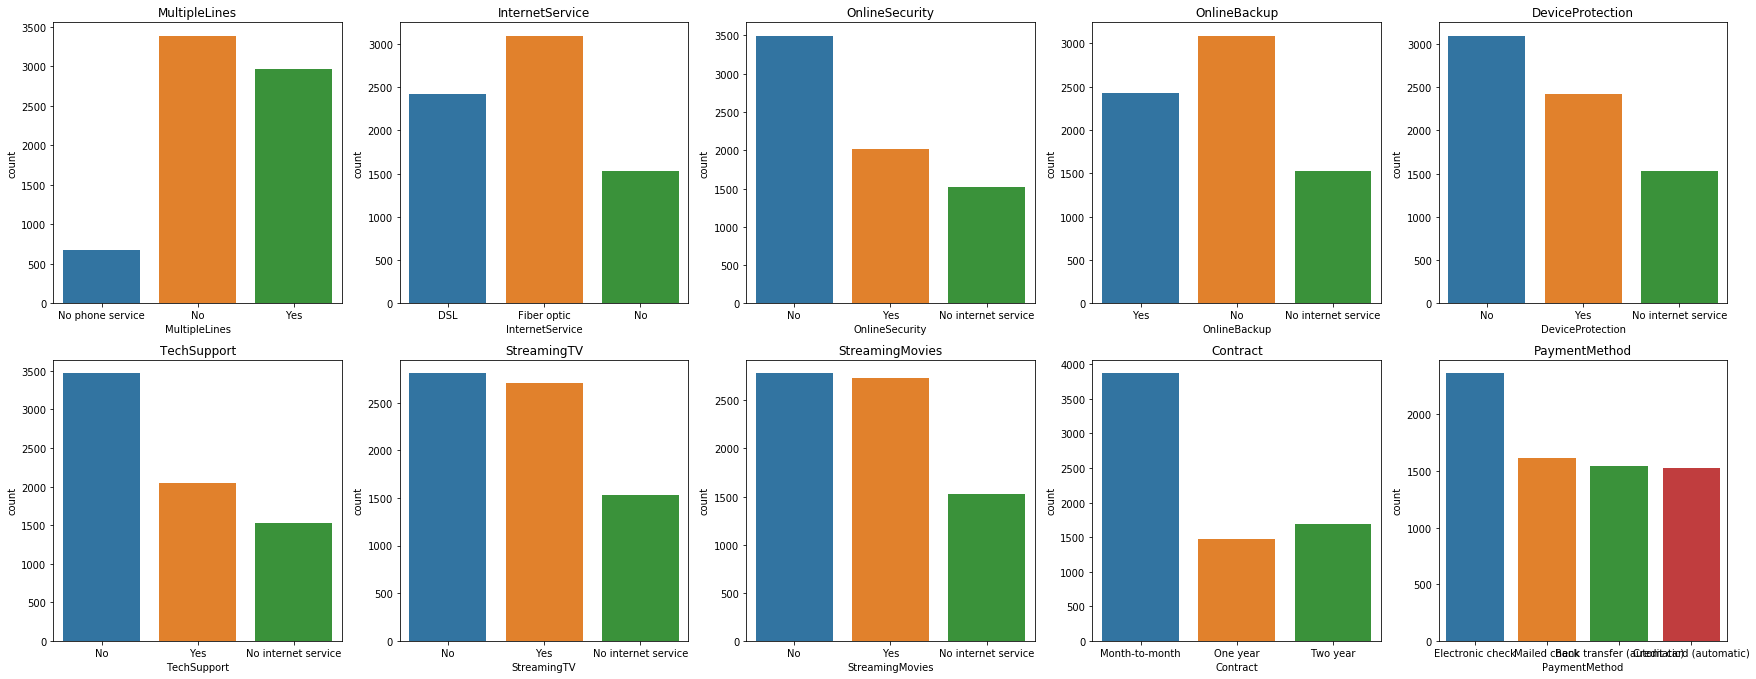

In [120]:
j = 1
plt.figure(figsize = (30,30))
for i in one_hot_cols:
    plt.subplot(5,5,j)
    f = plt.gca()
    f.set_title(i)
    sns.countplot(df[i])
    j += 1

# Reload the data , taking different approach to feature engineering , combining feature categories with similar meanings

In [132]:
df = pd.read_csv(r'telco.csv')

# No phone services means that you do not have multiple lines

In [133]:
df.MultipleLines = df.MultipleLines.apply(lambda x: 'No' if x == 'No phone service' else x)

# No internet means that you do not have OnlineSecurity, OnlineBackup, StreamingTV, StreamingMovies, DeviceProtection, TechSupport

In [134]:
df.OnlineSecurity = df.OnlineSecurity.apply(lambda x: 'No' if x =='No internet service' else x)
df.OnlineBackup = df.OnlineBackup.apply(lambda x: 'No' if x=='No internet service' else x)

In [135]:
no_net = ['OnlineSecurity' , 'OnlineBackup' , 'DeviceProtection' , 'TechSupport' , 'StreamingTV' , 'StreamingMovies']
for i in no_net:
    df[i] = df[i].apply(lambda x: 'No' if x=='No internet service' else x)

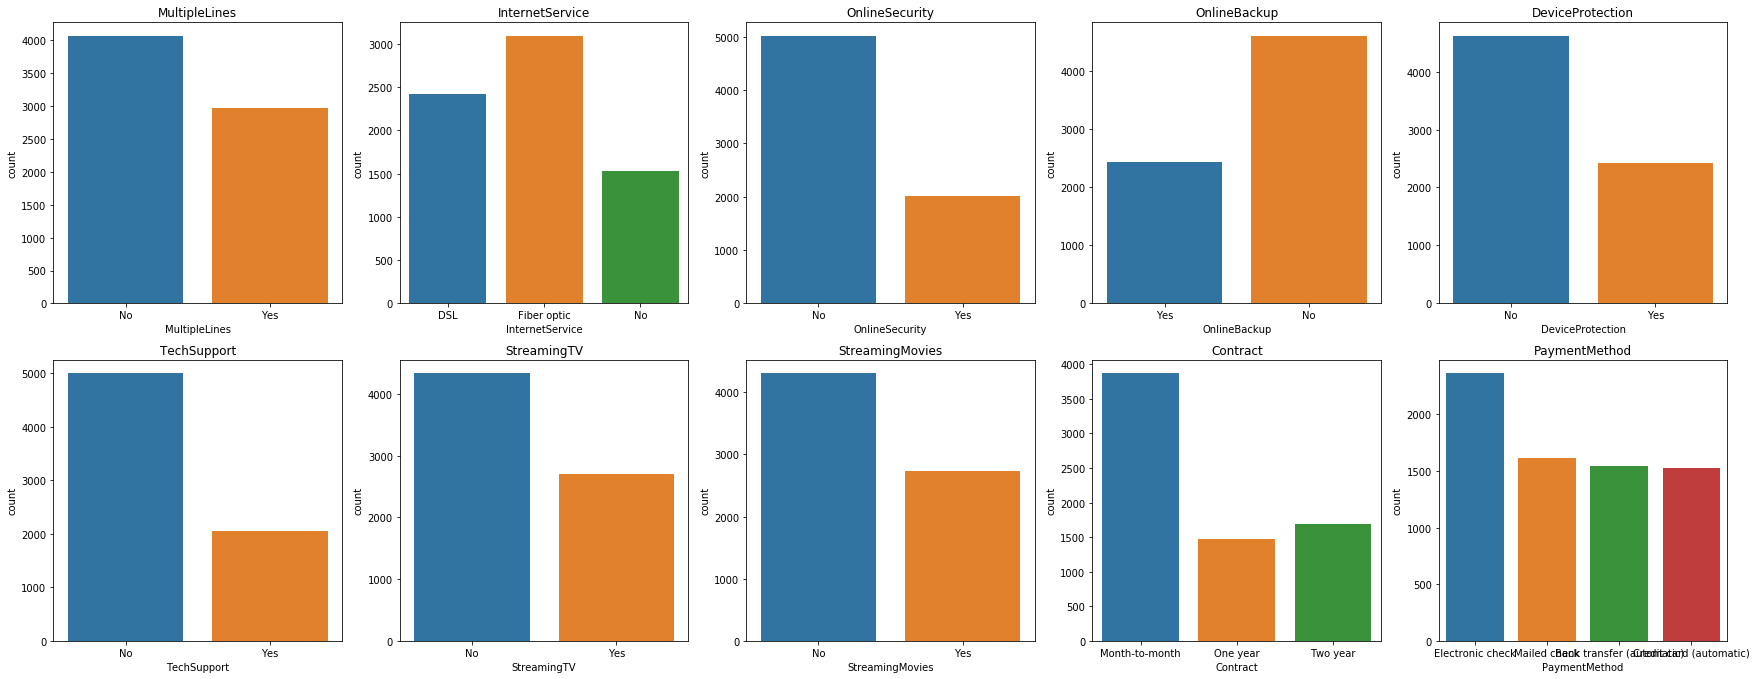

In [136]:
j = 1
plt.figure(figsize = (30,30))
for i in one_hot_cols:
    plt.subplot(5,5,j)
    f = plt.gca()
    f.set_title(i)
    sns.countplot(df[i])
    j += 1

In [140]:
for i in df.columns:
    if len(list(df[i].unique())) <= 5:
        print("%s : %s -> %s" % (i , len(list(df[i].unique())) , df[i].dtype))
        print("%s : %s\n" % (i , list(df[i].unique())))
    else:
        print("%s : %s -> %s\n" % (i , len(list(df[i].unique())) , df[i].dtype))

customerID : 7043 -> object

gender : 2 -> object
gender : ['Female', 'Male']

SeniorCitizen : 2 -> int64
SeniorCitizen : [0, 1]

Partner : 2 -> object
Partner : ['Yes', 'No']

Dependents : 2 -> object
Dependents : ['No', 'Yes']

tenure : 73 -> int64

PhoneService : 2 -> object
PhoneService : ['No', 'Yes']

MultipleLines : 2 -> object
MultipleLines : ['No', 'Yes']

InternetService : 3 -> object
InternetService : ['DSL', 'Fiber optic', 'No']

OnlineSecurity : 2 -> object
OnlineSecurity : ['No', 'Yes']

OnlineBackup : 2 -> object
OnlineBackup : ['Yes', 'No']

DeviceProtection : 2 -> object
DeviceProtection : ['No', 'Yes']

TechSupport : 2 -> object
TechSupport : ['No', 'Yes']

StreamingTV : 2 -> object
StreamingTV : ['No', 'Yes']

StreamingMovies : 2 -> object
StreamingMovies : ['No', 'Yes']

Contract : 3 -> object
Contract : ['Month-to-month', 'One year', 'Two year']

PaperlessBilling : 2 -> object
PaperlessBilling : ['Yes', 'No']

PaymentMethod : 4 -> object
PaymentMethod : ['Electroni

# Going through the usual process , encoding categorical variables , and comparing LR and RF performance with and without using SMOTE to counter the class imbalance

In [155]:
binary_cols_2 = ['gender' , 'SeniorCitizen' , 'Partner' , 'Dependents' , 'PhoneService' , 'MultipleLines' , 'OnlineSecurity' , 'OnlineBackup' , 'DeviceProtection' , 'TechSupport' , 'StreamingTV' , 'StreamingMovies' , 'PaperlessBilling']
one_hot_cols2 =['InternetService' , 'Contract' , 'PaymentMethod']
df2 = df
binary_map_dict2 = {}
for i in binary_cols_2:
    df2[i] = lb.fit_transform(df2[i])
    binary_map_dict2[i] = {index: label for index,label in enumerate(lb.classes_)}

new_df2 = pd.get_dummies(data = df2 , columns = one_hot_cols2 )

In [160]:
new_df2.TotalCharges = new_df2.TotalCharges.apply(lambda x: np.nan if x == ' ' else x)
new_df2.TotalCharges = new_df2.TotalCharges.astype(float)
new_df2.TotalCharges = new_df2.TotalCharges.fillna(0)

In [161]:
new_df2['MonthlyCharge']  = new_df2[['tenure','MonthlyCharges','TotalCharges']].apply(newmonthlycharge,axis = 1)
new_df2 = new_df2.drop(columns = ['tenure','TotalCharges','MonthlyCharges'])

In [174]:
X = new_df2.drop(columns = ['Churn'])
y = new_df2.Churn

In [175]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.2 , random_state = 32)

In [176]:
train_identifier = X_train.customerID
X_train = X_train.drop(columns = 'customerID')
test_identifier = X_test.customerID
X_test = X_test.drop(columns = 'customerID')

In [171]:
rf = RandomForestClassifier(n_estimators = 100)
rf.fit(X_train , y_train)
y_pred = rf.predict(X_test)
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

           0       0.78      0.86      0.82       996
           1       0.56      0.41      0.47       413

   micro avg       0.73      0.73      0.73      1409
   macro avg       0.67      0.64      0.65      1409
weighted avg       0.71      0.73      0.72      1409



In [172]:
rf_new = RandomForestClassifier(bootstrap = True , max_depth = 90 , max_features = 4 , min_samples_leaf = 5 , min_samples_split = 8 , n_estimators = 100)
rf_new.fit(X_train , y_train)
y_pred = rf_new.predict(X_test)
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

           0       0.80      0.90      0.85       996
           1       0.66      0.45      0.54       413

   micro avg       0.77      0.77      0.77      1409
   macro avg       0.73      0.68      0.69      1409
weighted avg       0.76      0.77      0.76      1409



In [185]:
X = new_df2.drop(columns = ['Churn'])
y = new_df2.Churn
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.2 , random_state = 32)
train_identifier = X_train.customerID
X_train = X_train.drop(columns = 'customerID')
test_identifier = X_test.customerID
X_test = X_test.drop(columns = 'customerID')
sm = SMOTE(random_state=12 , ratio = 0.75)
x_train_res  , y_train_res = sm.fit_sample(X_train , y_train)
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 35 , penalty = 'l2' , C = 1 , multi_class = 'ovr' , max_iter = 100 , solver = 'liblinear')
classifier.fit(x_train_res , y_train_res)
y_pred = classifier.predict(X_test)
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

           0       0.89      0.74      0.81       996
           1       0.56      0.78      0.65       413

   micro avg       0.75      0.75      0.75      1409
   macro avg       0.72      0.76      0.73      1409
weighted avg       0.79      0.75      0.76      1409



In [196]:
x_train_res , y_train_res = sm.fit_sample(X_train , y_train)
rf_new = RandomForestClassifier(bootstrap = True , max_depth = 90 , max_features = 4 , min_samples_leaf = 10 , min_samples_split = 8 , n_estimators = 100)
rf_new.fit(x_train_res , y_train_res)
y_pred = rf_new.predict(X_test)
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

           0       0.86      0.83      0.84       996
           1       0.61      0.66      0.64       413

   micro avg       0.78      0.78      0.78      1409
   macro avg       0.74      0.75      0.74      1409
weighted avg       0.78      0.78      0.78      1409



# Accuracy varies by about 10-ish % across the 10 folds, need to find a way to fix this

In [197]:
from sklearn.model_selection import cross_val_score
accu = cross_val_score(estimator = rf_new , X = x_train_res , y = y_train_res , cv = 10)

In [198]:
print(accu)

[0.75273224 0.75956284 0.74043716 0.73187415 0.76333789 0.87824897
 0.86593707 0.8495212  0.85753425 0.88493151]
